# Satellite Image Classification

## -> Problem Description
- Satellite images are needed to be classified under one of the following classes:
    - Cloudy
    - Desert
    - Green Area
    - Water

## -> About Dataset
- Satellite image Classification Dataset-RSI-CB256 , This dataset has 4 different classes mixed from Sensors and google map snapshot.

## -> Models used
- Multi-layer Perceptron
- Convolutional Neural Network
- Resnet
- EfficientNet

## -> Evaluation Metrics
- Accuracy
- Precision
- Recall
- F1-score

## 1. Importing the required libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import random
import shutil

In [3]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

## 2. Getting the data

In [4]:
dataset_path = "Dataset/satellite_images"

In [5]:
for dirpath, dirname, filename in os.walk(dataset_path):
    print(f"Directory: {dirpath}")
    print(f"Number of Directories: {len(dirname)}")
    print(f"Number of images: {len(filename)}\n")

Directory: Dataset/satellite_images
Number of Directories: 4
Number of images: 0

Directory: Dataset/satellite_images\cloudy
Number of Directories: 0
Number of images: 1500

Directory: Dataset/satellite_images\desert
Number of Directories: 0
Number of images: 1131

Directory: Dataset/satellite_images\green_area
Number of Directories: 0
Number of images: 1500

Directory: Dataset/satellite_images\water
Number of Directories: 0
Number of images: 1500



In [6]:
class_names = []
for dirname in os.listdir(dataset_path):
    class_names.append(dirname)
class_names

['cloudy', 'desert', 'green_area', 'water']

In [7]:
cloudy_images = []
desert_images = []
green_area_images = []
water_images = []

for single_class in class_names:
    for file_name in os.listdir(dataset_path+"/"+single_class):
        if single_class == "cloudy":
            cloudy_images.append(dataset_path+"/"+single_class+"/"+file_name)
        if single_class == "desert":
            desert_images.append(dataset_path+"/"+single_class+"/"+file_name)
        if single_class == "green_area":
            green_area_images.append(dataset_path+"/"+single_class+"/"+file_name)
        if single_class == "water":
            water_images.append(dataset_path+"/"+single_class+"/"+file_name)

print(f"Cloudy images (upto 5 img)\n{cloudy_images[:5]}")
print(f"Desert images (upto 5 img)\n{desert_images[:5]}")
print(f"Green area images (upto 5 img)\n{green_area_images[:5]}")
print(f"Water images (upto 5 img)\n{water_images[:5]}")

Cloudy images (upto 5 img)
['Dataset/satellite_images/cloudy/train_10021.jpg', 'Dataset/satellite_images/cloudy/train_10043.jpg', 'Dataset/satellite_images/cloudy/train_10070.jpg', 'Dataset/satellite_images/cloudy/train_10081.jpg', 'Dataset/satellite_images/cloudy/train_10096.jpg']
Desert images (upto 5 img)
['Dataset/satellite_images/desert/desert(1).jpg', 'Dataset/satellite_images/desert/desert(10).jpg', 'Dataset/satellite_images/desert/desert(100).jpg', 'Dataset/satellite_images/desert/desert(1000).jpg', 'Dataset/satellite_images/desert/desert(1001).jpg']
Green area images (upto 5 img)
['Dataset/satellite_images/green_area/Forest_1404.jpg', 'Dataset/satellite_images/green_area/Forest_1419.jpg', 'Dataset/satellite_images/green_area/Forest_1456.jpg', 'Dataset/satellite_images/green_area/Forest_1464.jpg', 'Dataset/satellite_images/green_area/Forest_1465.jpg']
Water images (upto 5 img)
['Dataset/satellite_images/water/SeaLake_1.jpg', 'Dataset/satellite_images/water/SeaLake_1004.jpg', 'D

In [8]:
len(cloudy_images), len(desert_images), len(green_area_images), len(water_images)
# since the desert class is less in number when compared to other classes
# we make the train set to be 1000 images for each class and rest of them as test set

(1500, 1131, 1500, 1500)

### 2.1. Visualizing Random Images

In [9]:
def view_random_images(class_name):
    """
    View a random image on specified class
    """
    random_img = random.sample(os.listdir("Dataset/satellite_images/"+class_name), 1)[0]
    img = plt.imread("Dataset/satellite_images/"+class_name+"/"+random_img)/255.
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Class: {class_name.upper()}\nImage: {random_img}")

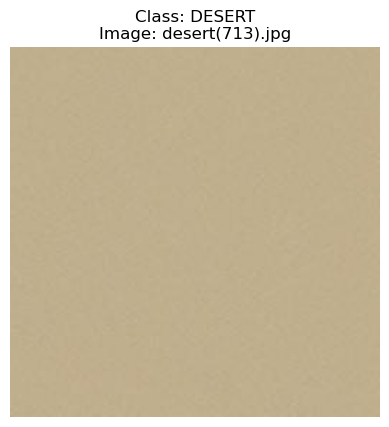

In [10]:
view_random_images("desert")

### 2.2. Making Train and Test splits
- Train set: 1100 images for each class
- Test set: 400 images for each class except desert_images which has 31 test images

In [11]:
class_names

['cloudy', 'desert', 'green_area', 'water']

In [12]:
len(cloudy_images), len(desert_images), len(green_area_images), len(water_images)

(1500, 1131, 1500, 1500)

In [13]:
os.listdir("Dataset/satellite_images/cloudy")[:1100]

['train_10021.jpg',
 'train_10043.jpg',
 'train_10070.jpg',
 'train_10081.jpg',
 'train_10096.jpg',
 'train_101.jpg',
 'train_10128.jpg',
 'train_10166.jpg',
 'train_10173.jpg',
 'train_10177.jpg',
 'train_10201.jpg',
 'train_10224.jpg',
 'train_10225.jpg',
 'train_10231.jpg',
 'train_10263.jpg',
 'train_10265.jpg',
 'train_10269.jpg',
 'train_10293.jpg',
 'train_10326.jpg',
 'train_10333.jpg',
 'train_10389.jpg',
 'train_10406.jpg',
 'train_10421.jpg',
 'train_10451.jpg',
 'train_10485.jpg',
 'train_10493.jpg',
 'train_10538.jpg',
 'train_10540.jpg',
 'train_10547.jpg',
 'train_10552.jpg',
 'train_10555.jpg',
 'train_10563.jpg',
 'train_10566.jpg',
 'train_10581.jpg',
 'train_10598.jpg',
 'train_1060.jpg',
 'train_10609.jpg',
 'train_10621.jpg',
 'train_10642.jpg',
 'train_10661.jpg',
 'train_10666.jpg',
 'train_10667.jpg',
 'train_10687.jpg',
 'train_1070.jpg',
 'train_10710.jpg',
 'train_10788.jpg',
 'train_10793.jpg',
 'train_108.jpg',
 'train_10816.jpg',
 'train_10856.jpg',
 'trai

In [14]:
len(os.listdir("Dataset/satellite_images/cloudy")[:1100])

1100

In [15]:
def copy_train_images():
    # defining source and destination paths
    src = "Dataset/satellite_images"
    trg = "Dataset/satellite_images_modified"

    for class_name in class_names:
        files = os.listdir(src+"/"+class_name)[:1100] # copying train data
        # iterating over all the files
        for filename in files:
            # copying the files to the destination directory
            img_src = src+"/"+class_name+"/"+filename
            img_dst = trg+"/train/"+class_name
            shutil.copy2(img_src, img_dst)
    print(f"Cloud: {len(os.listdir(trg+'/train/cloudy'))} images copied")
    print(f"Desert: {len(os.listdir(trg+'/train/desert'))} images copied")
    print(f"Green area: {len(os.listdir(trg+'/train/green_area'))} images copied")
    print(f"Water: {len(os.listdir(trg+'/train/water'))} images copied")

In [16]:
#copy_train_images()

In [17]:
def copy_test_images():
    # defining source and destination paths
    src = "Dataset/satellite_images"
    trg = "Dataset/satellite_images_modified"

    for class_name in class_names:
        files = os.listdir(src+"/"+class_name)[1100:] # copying test data
        # iterating over all the files
        for filename in files:
            # copying the files to the destination directory
            img_src = src+"/"+class_name+"/"+filename
            img_dst = trg+"/test/"+class_name
            shutil.copy2(img_src, img_dst)
    print(f"Cloud: {len(os.listdir(trg+'/test/cloudy'))} images copied")
    print(f"Desert: {len(os.listdir(trg+'/test/desert'))} images copied")
    print(f"Green area: {len(os.listdir(trg+'/test/green_area'))} images copied")
    print(f"Water: {len(os.listdir(trg+'/test/water'))} images copied")

In [18]:
#copy_test_images()

In [19]:
for dirpath, dirname, filename in os.walk("Dataset/satellite_images_modified"):
    print(f"Directory: {dirpath}")
    print(f"Number of Directories: {len(dirname)}")
    print(f"Number of images: {len(filename)}\n")

Directory: Dataset/satellite_images_modified
Number of Directories: 2
Number of images: 0

Directory: Dataset/satellite_images_modified\test
Number of Directories: 4
Number of images: 0

Directory: Dataset/satellite_images_modified\test\cloudy
Number of Directories: 0
Number of images: 400

Directory: Dataset/satellite_images_modified\test\desert
Number of Directories: 0
Number of images: 31

Directory: Dataset/satellite_images_modified\test\green_area
Number of Directories: 0
Number of images: 400

Directory: Dataset/satellite_images_modified\test\water
Number of Directories: 0
Number of images: 400

Directory: Dataset/satellite_images_modified\train
Number of Directories: 4
Number of images: 0

Directory: Dataset/satellite_images_modified\train\cloudy
Number of Directories: 0
Number of images: 1100

Directory: Dataset/satellite_images_modified\train\desert
Number of Directories: 0
Number of images: 1100

Directory: Dataset/satellite_images_modified\train\green_area
Number of Director

## 3. Preprocessing data

In [20]:
# set up train, test directories
train_dir = "Dataset/satellite_images_modified/train"
test_dir = "Dataset/satellite_images_modified/test"

BATCH_SIZE = 32
IMAGE_SIZE = (224,224)
# preparing dataset
train_images = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                   batch_size=BATCH_SIZE,
                                                                   image_size=IMAGE_SIZE,
                                                                   label_mode="categorical",
                                                                   seed=42)
test_images = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                   batch_size=BATCH_SIZE,
                                                                   image_size=IMAGE_SIZE,
                                                                   label_mode="categorical",
                                                                   shuffle=False, # needs to be specified otherwise we can't calculate metrics
                                                                   seed=42)
train_images, test_images

Found 4400 files belonging to 4 classes.
Found 1231 files belonging to 4 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>)

In [21]:
train_images.class_names

['cloudy', 'desert', 'green_area', 'water']

In [22]:
for img, label in train_images.take(1):
    print(img, label)
# needs the img to be rescaled in the range [0,1]

tf.Tensor(
[[[[ 37.        64.        73.      ]
   [ 37.        64.        73.      ]
   [ 37.214287  64.21429   73.21429 ]
   ...
   [ 35.        65.571434  70.78572 ]
   [ 35.        66.        71.      ]
   [ 35.        66.        71.      ]]

  [[ 37.        64.        73.      ]
   [ 37.        64.        73.      ]
   [ 37.214287  64.21429   73.21429 ]
   ...
   [ 35.        65.571434  70.78572 ]
   [ 35.        66.        71.      ]
   [ 35.        66.        71.      ]]

  [[ 37.        64.        73.      ]
   [ 37.        64.        73.      ]
   [ 37.214287  64.21429   73.21429 ]
   ...
   [ 34.954082  65.617355  70.78572 ]
   [ 35.        66.        71.      ]
   [ 35.        66.        71.      ]]

  ...

  [[ 47.071415  65.07141   75.07141 ]
   [ 47.071415  65.07141   75.07141 ]
   [ 47.071415  65.07141   75.07141 ]
   ...
   [ 41.551014  66.55101   73.55101 ]
   [ 41.428566  66.428566  73.428566]
   [ 41.428566  66.428566  73.428566]]

  [[ 46.        64.        74.    

In [23]:
for img, label in test_images.take(1):
    print(img, label)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

## 4. Creating Callbacks and Evaluation function
- Callbacks
    - EarlyStopping Callback
    - ModelCheckpoint Callback
    - Tensorboard Callback
- Evaluation function
    - Accuracy
    - Precision
    - Recall
    - F1-score

In [24]:
# creating EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=30, verbose=1)

# creating Tensorboard callback
def create_tensorboard_callback(model_name, file_path):
    return tf.keras.callbacks.TensorBoard(log_dir=file_path+"/"+model_name, update_freq="epoch")

In [25]:
# creating evaluation function
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted", zero_division=0)
    # zero_division=0 for removing the warning
    metrics_dict = {
        "Accuracy":accuracy*100,
        "Precision": precision*100,
        "Recall": recall*100,
        "F1-score": f1_score*100
    }
    return metrics_dict

In [26]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [27]:
# labelling the test set labels
y_labels = []
for img, label in test_images.unbatch():
    y_labels.append(label.numpy().argmax())
y_labels[:5]

[0, 0, 0, 0, 0]

In [28]:
test_images.class_names

['cloudy', 'desert', 'green_area', 'water']

## 5. Creating Models

### 5.1. Creating Multi-layer Perceptron

In [29]:
TENSORBOARD_FILEPATH = "callbacks/tensorboard"
MODEL_CHECKPOINT_FILEPATH = "callbacks/model_checkpoints"

In [30]:
train_images.class_names

['cloudy', 'desert', 'green_area', 'water']

In [31]:
# set random seed
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1/255.),
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # needs to be flattened
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
], name="model_1_Dense")

# compile the model
model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_1_history = model_1.fit(train_images, epochs=50, validation_data=test_images, validation_steps=len(test_images), callbacks=[early_stopping, create_tensorboard_callback(model_name="model_1_Dense", file_path=TENSORBOARD_FILEPATH), tf.keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT_FILEPATH+"/"+model_1.name, monitor="val_loss", save_best_only=True)])

Epoch 1/50
138/138 [==============================] - 7s 41ms/step - loss: 3.5005 - accuracy: 0.7168 - val_loss: 4.0274 - val_accuracy: 0.6840
Epoch 2/50
138/138 [==============================] - 4s 30ms/step - loss: 1.7560 - accuracy: 0.7750 - val_loss: 1.3744 - val_accuracy: 0.7628
Epoch 3/50
138/138 [==============================] - 3s 21ms/step - loss: 0.9915 - accuracy: 0.8125 - val_loss: 2.5279 - val_accuracy: 0.6799
Epoch 4/50
138/138 [==============================] - 4s 27ms/step - loss: 0.8217 - accuracy: 0.8209 - val_loss: 0.4966 - val_accuracy: 0.8497
Epoch 5/50
138/138 [==============================] - 3s 22ms/step - loss: 0.6379 - accuracy: 0.8436 - val_loss: 0.7181 - val_accuracy: 0.8091
Epoch 6/50
138/138 [==============================] - 3s 21ms/step - loss: 0.5045 - accuracy: 0.8564 - val_loss: 1.0009 - val_accuracy: 0.7758
Epoch 7/50
138/138 [==============================] - 3s 21ms/step - loss: 0.8167 - accuracy: 0.8377 - val_loss: 3.1020 - val_accuracy: 0.6783

#### 5.1.1. Evaluating the model

In [32]:
# evaluate the model
model_1.evaluate(test_images)

39/39 [==============================] - 1s 14ms/step - loss: 0.2504 - accuracy: 0.9050


[0.25037574768066406, 0.9049553275108337]

In [33]:
model_1 = tf.keras.models.load_model(filepath=MODEL_CHECKPOINT_FILEPATH+"/model_1_Dense")
model_1.evaluate(test_images)

39/39 [==============================] - 1s 14ms/step - loss: 0.2292 - accuracy: 0.9123


[0.22917211055755615, 0.9122664332389832]

In [34]:
model_1_pred_probs = model_1.predict(test_images)
model_1_pred_probs[:5]
# prediction probabilities is returned for each class

39/39 [==============================] - 1s 13ms/step


array([[9.9994516e-01, 3.5514971e-05, 8.8975430e-06, 1.0456667e-05],
       [9.9994516e-01, 3.5514971e-05, 8.8975430e-06, 1.0456667e-05],
       [9.9994516e-01, 3.5514971e-05, 8.8975430e-06, 1.0456667e-05],
       [9.9994516e-01, 3.5514971e-05, 8.8975430e-06, 1.0456667e-05],
       [9.9994516e-01, 3.5514971e-05, 8.8975430e-06, 1.0456667e-05]],
      dtype=float32)

In [35]:
model_1_pred_probs[0]

array([9.9994516e-01, 3.5514971e-05, 8.8975430e-06, 1.0456667e-05],
      dtype=float32)

In [36]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0], dtype=int64)>

In [37]:
model_1_results = evaluate_preds(y_true=y_labels, y_preds=model_1_preds)
model_1_results

{'Accuracy': 91.22664500406174,
 'Precision': 91.36391382648867,
 'Recall': 91.22664500406174,
 'F1-score': 91.20663888829539}

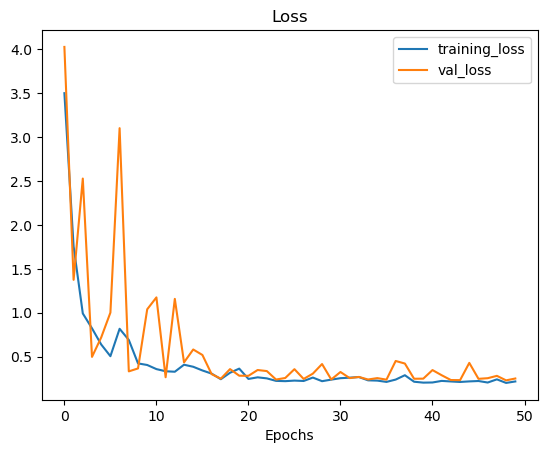

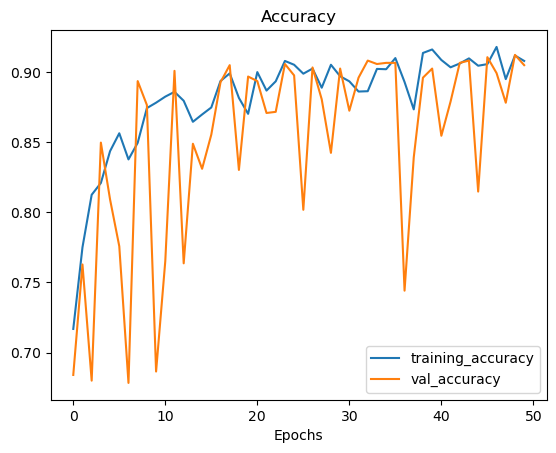

In [38]:
plot_loss_curves(model_1_history)

In [40]:
%load_ext tensorboard

In [41]:
%tensorboard --logdir "callbacks/tensorboard/model_1_Dense"

Launching TensorBoard...

In [39]:
# check the loss curves, it's incorrect with the evaluate method
# changes everytime